In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("dataset1.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [7]:
df['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [8]:
df['TWF'].value_counts()

0    9954
1      46
Name: TWF, dtype: int64

In [9]:
df['HDF'].value_counts()

0    9885
1     115
Name: HDF, dtype: int64

In [10]:
df['PWF'].value_counts()

0    9905
1      95
Name: PWF, dtype: int64

In [11]:
df['OSF'].value_counts()

0    9902
1      98
Name: OSF, dtype: int64

In [12]:
df['RNF'].value_counts()

0    9981
1      19
Name: RNF, dtype: int64

In [13]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.drop('UDI')

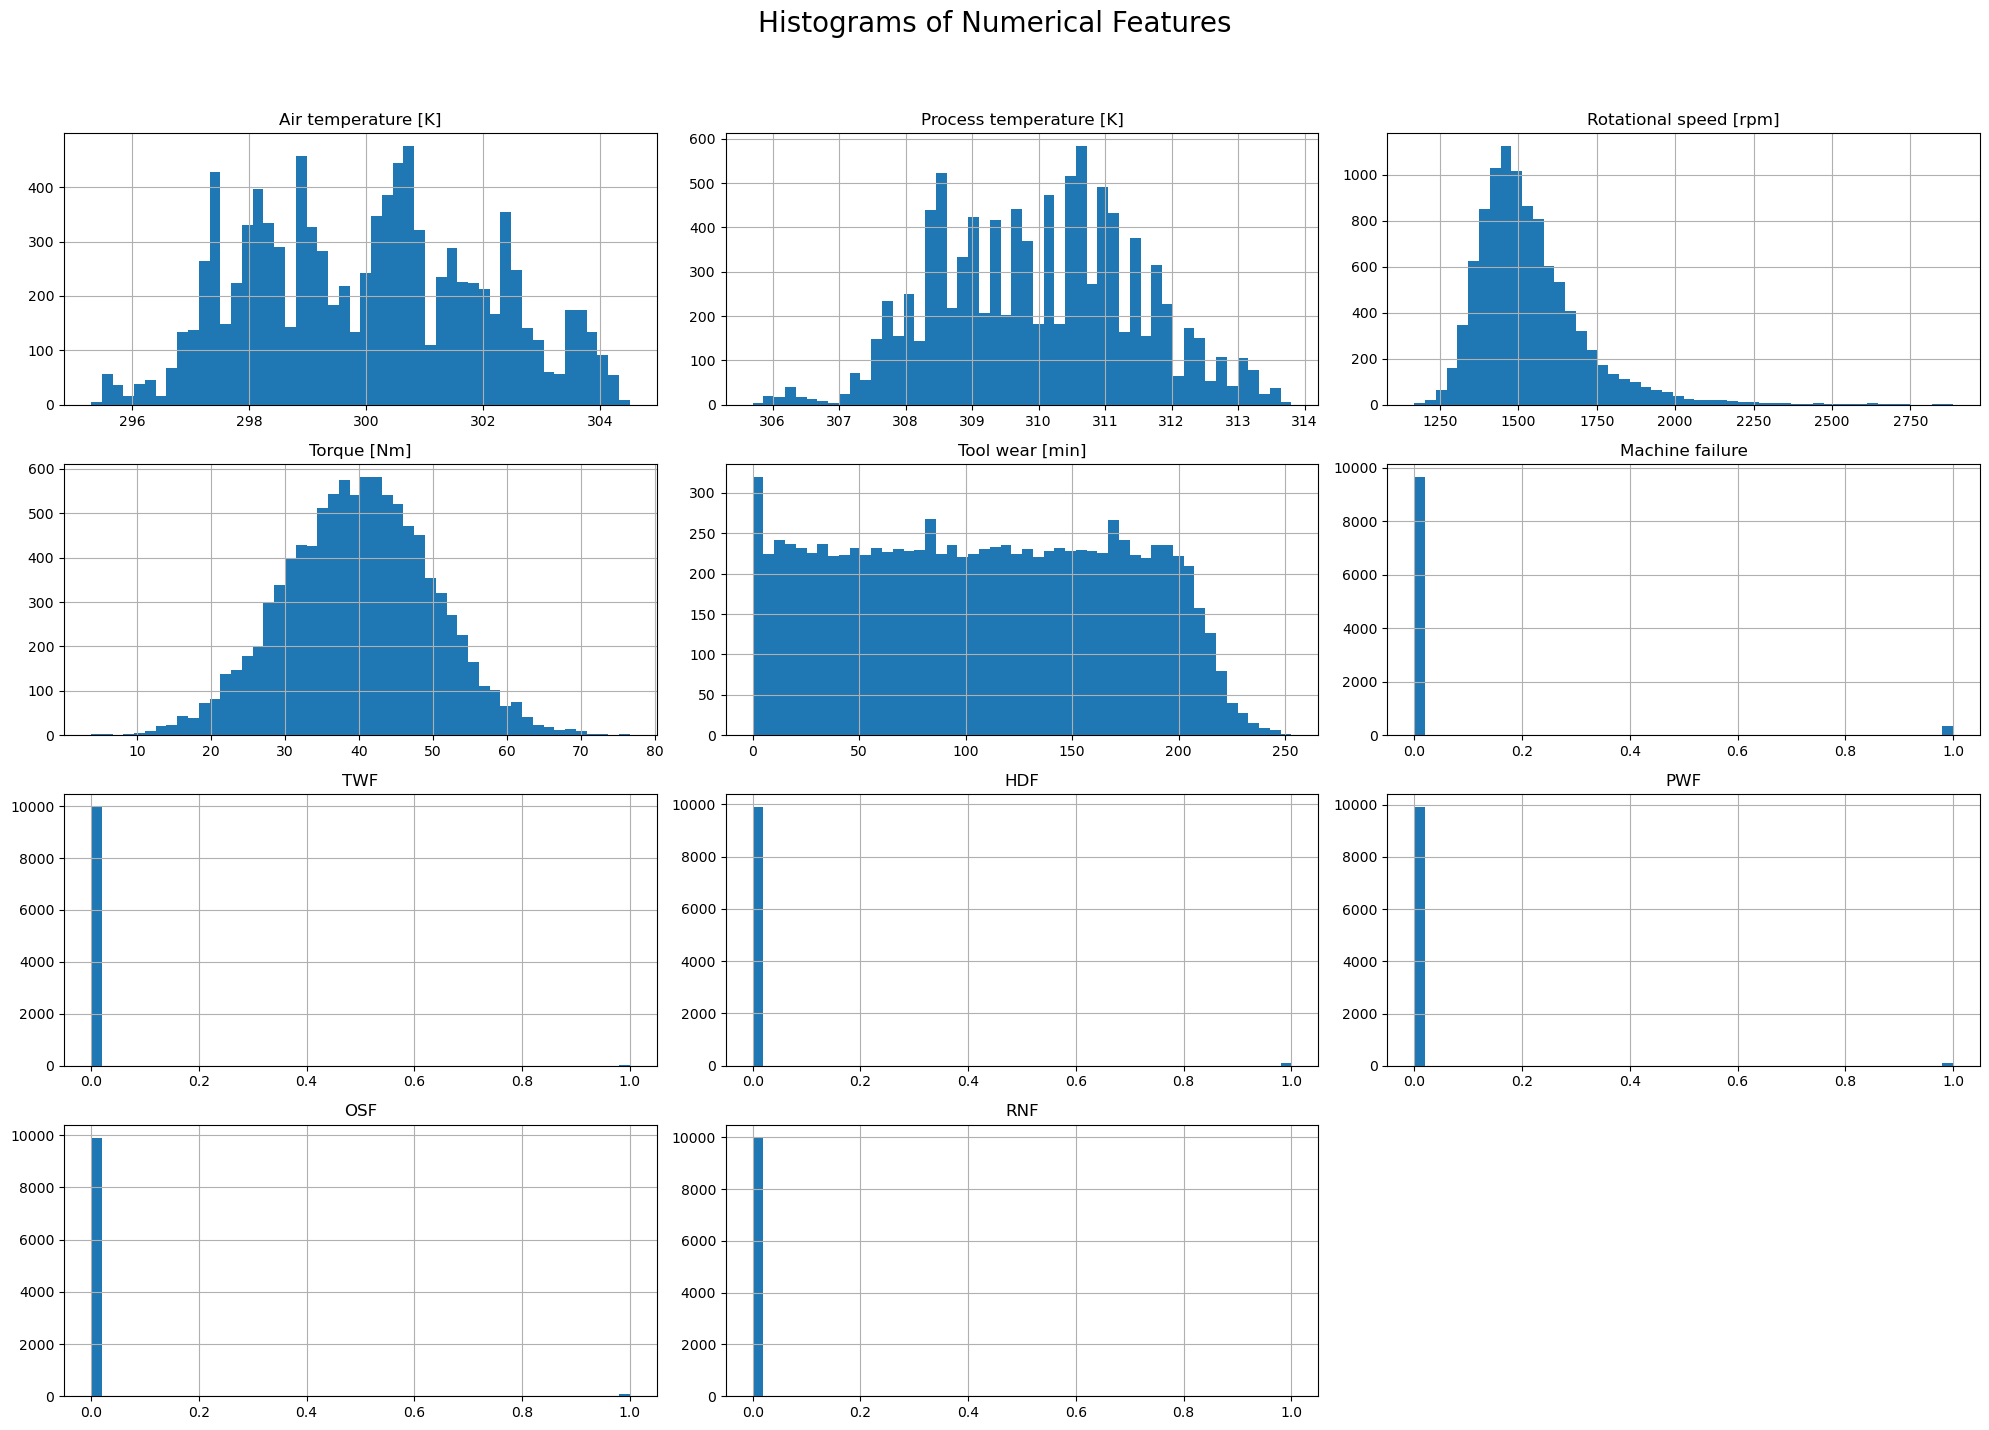

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df[numerical_features].hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

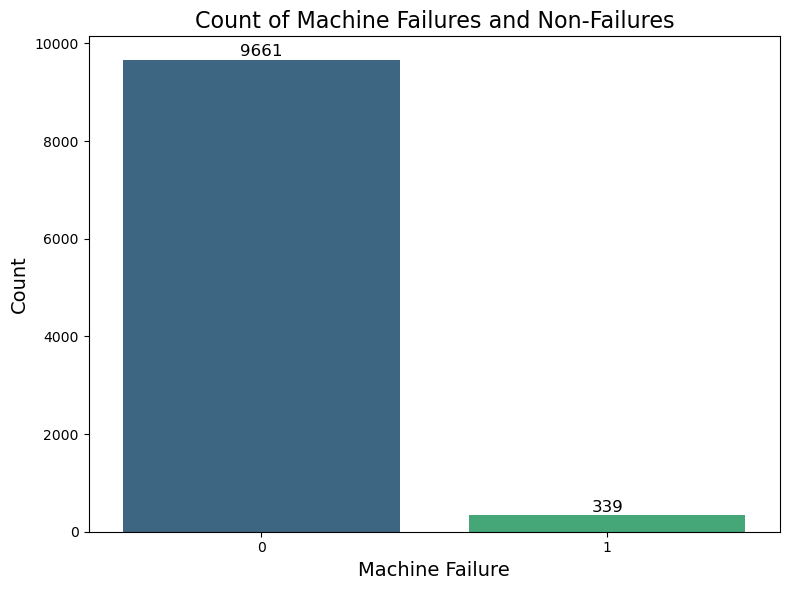

In [15]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Machine failure', data=df, palette='viridis')
plt.title('Count of Machine Failures and Non-Failures', fontsize=16)
plt.xlabel('Machine Failure', fontsize=14)
plt.ylabel('Count', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 10, 
            s=f'{int(height)}', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

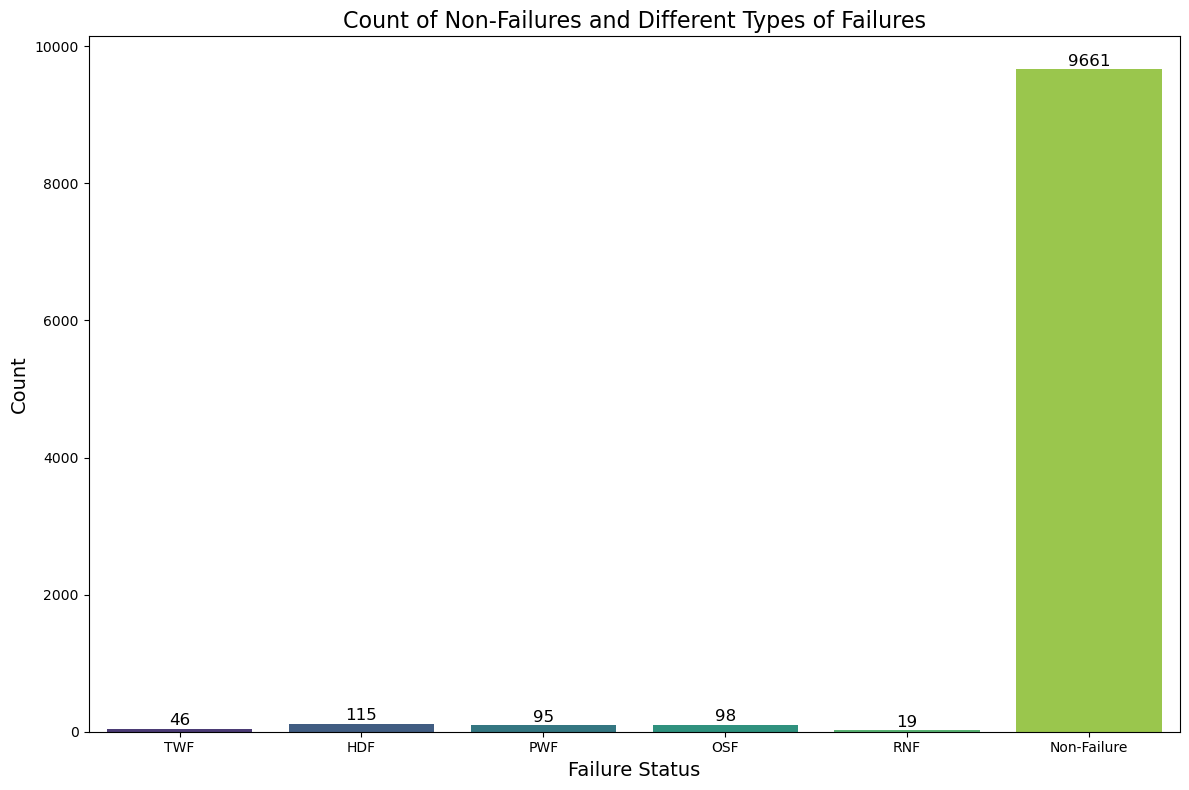

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Calculate the count of each failure type and non-failures
failure_counts = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
non_failures_count = len(df[df['Machine failure'] == 0])

# Combine into a single DataFrame for plotting
counts = pd.concat([failure_counts, pd.Series({'Non-Failure': non_failures_count})]).reset_index()
counts.columns = ['Failure Status', 'Count']

# Plot the count of each failure status, including non-failures
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Failure Status', y='Count', data=counts, palette='viridis')
plt.title('Count of Non-Failures and Different Types of Failures', fontsize=16)
plt.xlabel('Failure Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 10, s=f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()



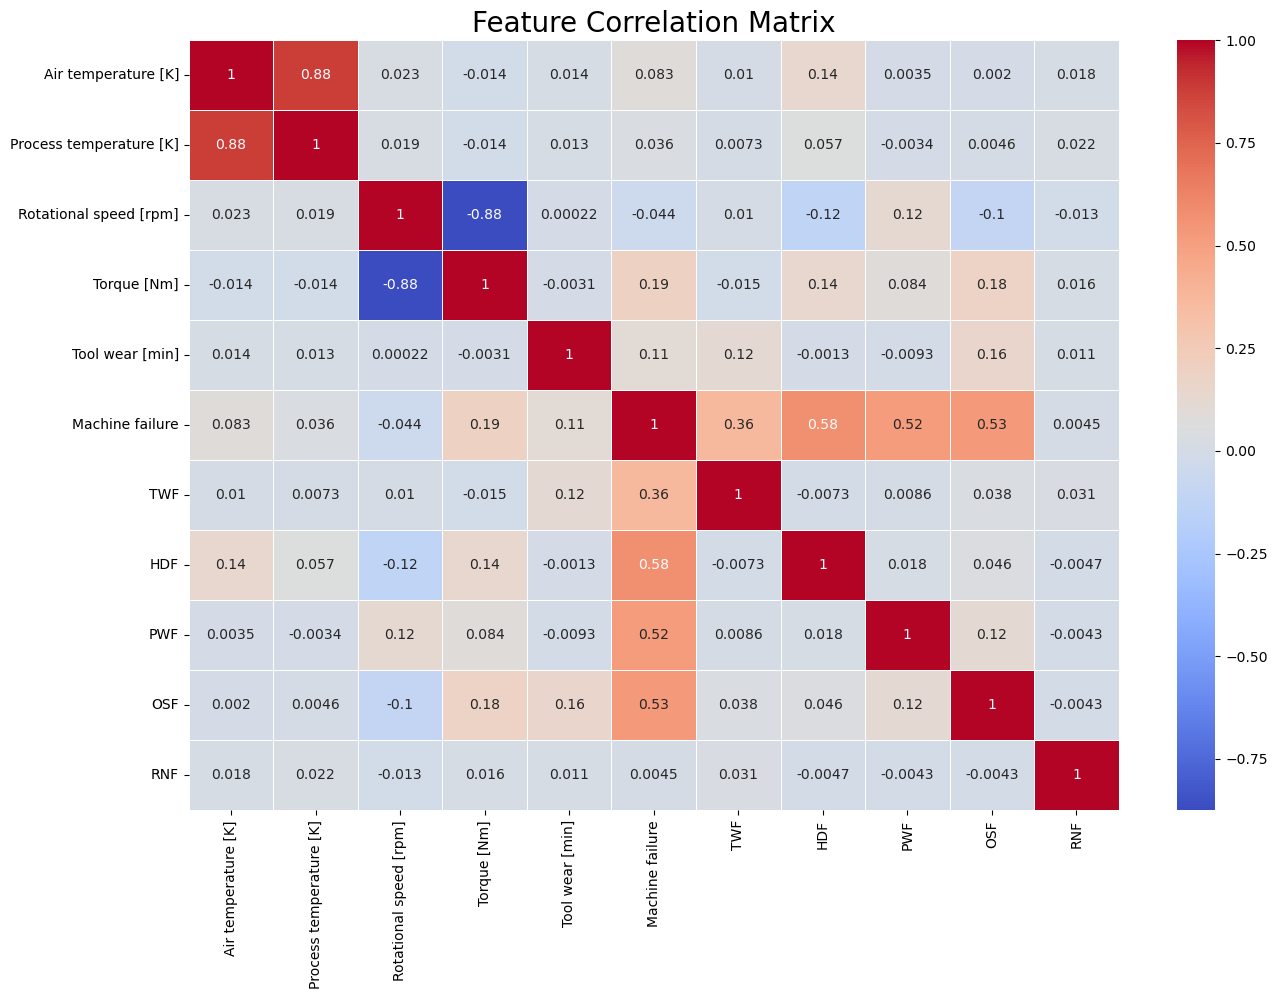

In [17]:
#Plotting Correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = df.drop(columns=['UDI']).corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=20)
plt.show()

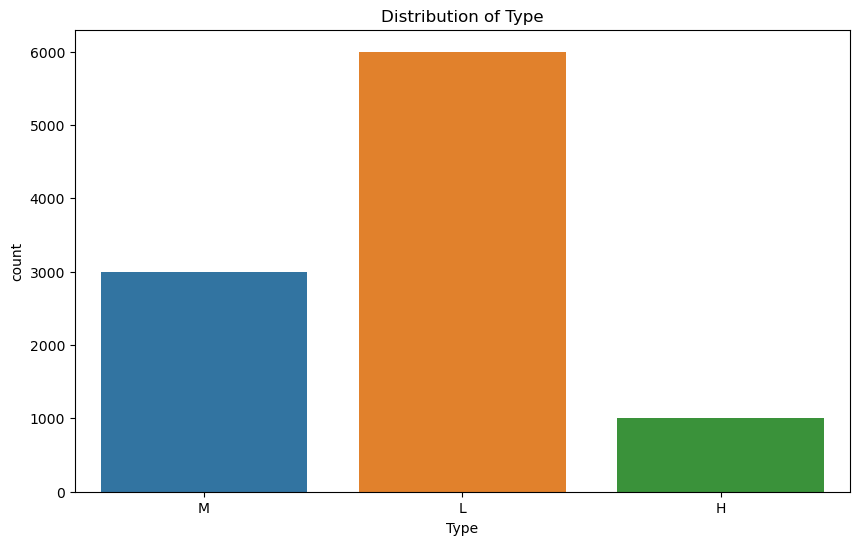

In [22]:
#Distribution of machine types
categorical_features = df.select_dtypes(include=['object']).columns.drop(['Product ID'])
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

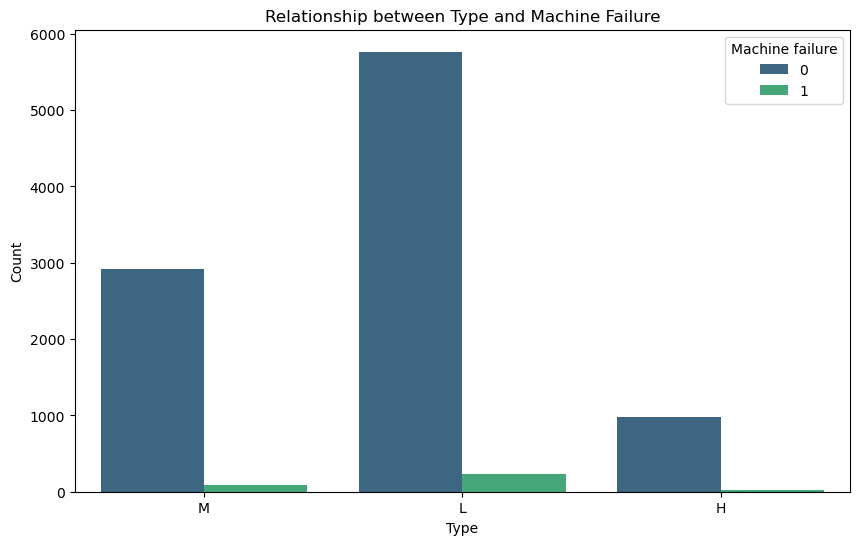

In [19]:
# Relationship between categorical feature 'Type' and machine failure
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', hue='Machine failure', data=df, palette='viridis')
plt.title('Relationship between Type and Machine Failure')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

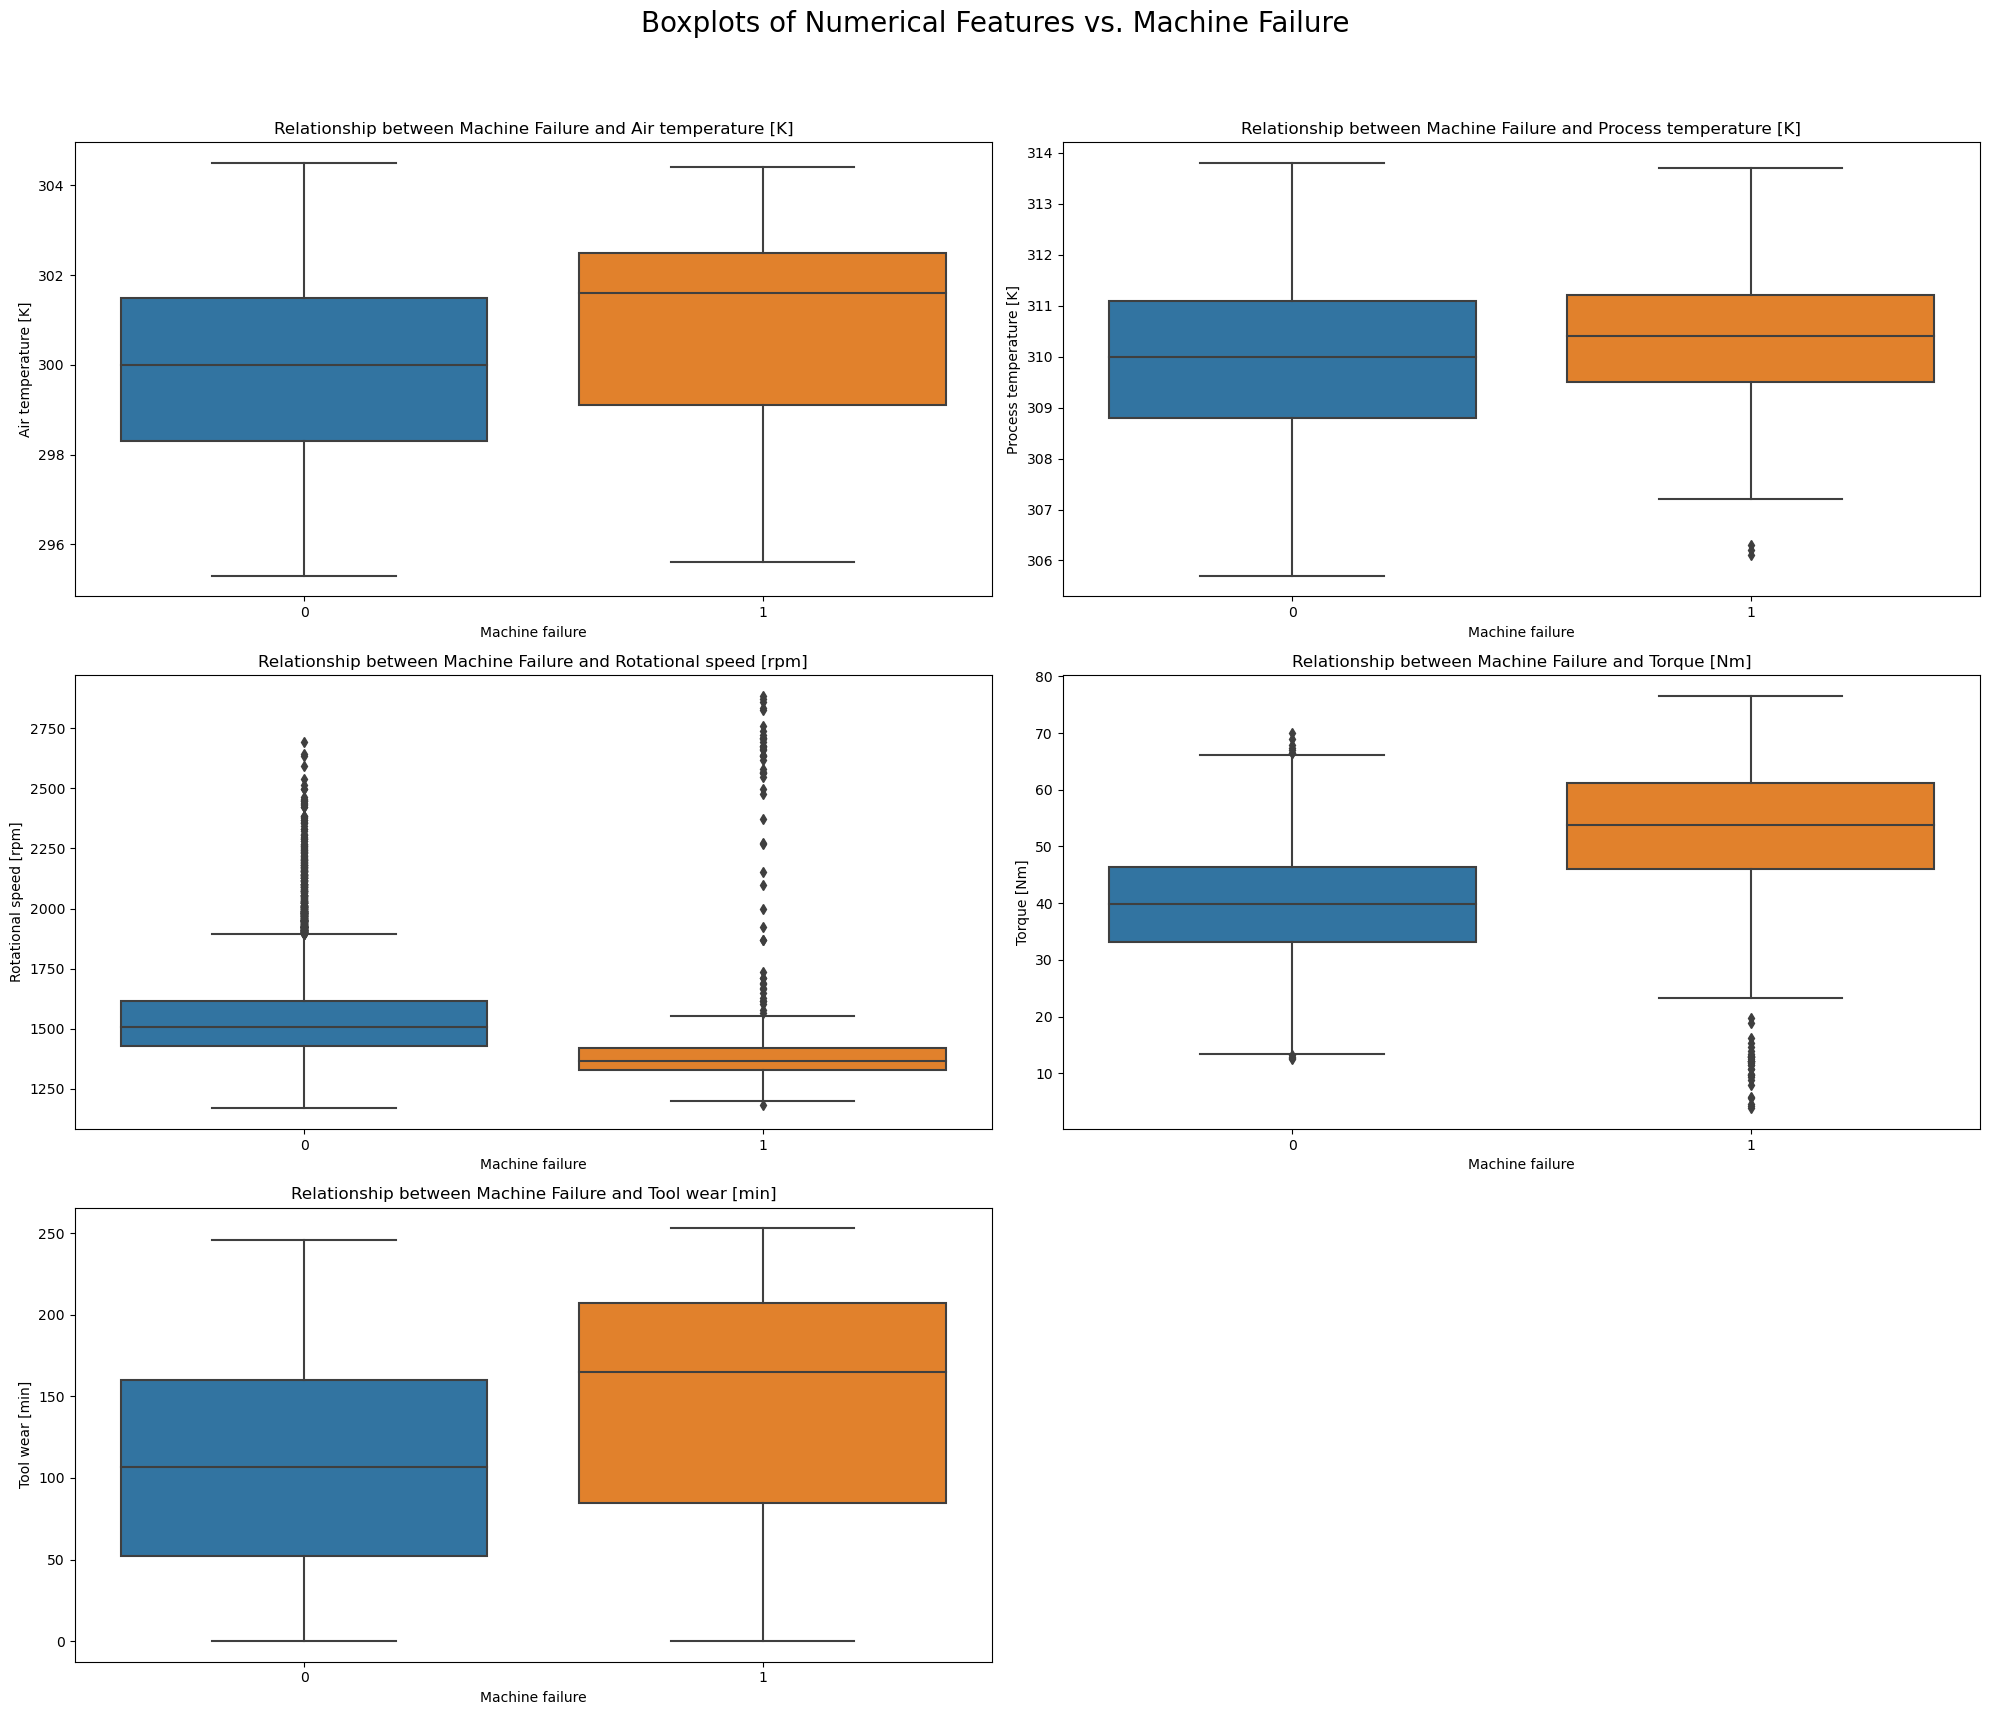

In [20]:
#Box pot about the relation between input features and machine failures
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.drop(['UDI', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])

n_cols = 2
n_rows = (len(numerical_features) - 1) // n_cols + 1 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()  

plot_id = 0
for feature in numerical_features:
    if feature != 'Machine failure':  
        sns.boxplot(x='Machine failure', y=feature, data=df, ax=axes[plot_id])
        axes[plot_id].set_title(f'Relationship between Machine Failure and {feature}')
        plot_id += 1

for j in range(plot_id, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Boxplots of Numerical Features vs. Machine Failure', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()